In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
#standardize x_variables to a variance and std of 1 for all indepedent variables
def standardize(data):
  data = pd.DataFrame(data)
  for i in data.columns:
    mean_value = data[i].mean()
    std_value = data[i].std()
    data[i] = (data[i] - mean_value)/std_value
  return data

In [4]:
#transform data to include dummy column to cater for Beta-not(intercept) on log of odds equation
def data_transform(x):
  model_x = np.c_[np.ones(shape=(x.shape[0],1)),x]
  return model_x

In [5]:
#model build function - use this
def model(x, y):
  beta = np.zeros(shape=(data_transform(x).shape[1],1))
  x = data_transform(x)
  y = np.array(y).reshape(len(y), 1)
  return x, y, beta

In [6]:
#sigmoid functin for estimation of y_hat
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [7]:
def costfunction(beta, x, y): 
  epsilon = 0.00000000000000000000000000001
  y_hat = sigmoid(np.dot(x, beta))

  #y_hat and y defined.
  #compute costfunction

  c_y = y*np.log(y_hat+epsilon)
  c_yi = (1-y)*np.log(1-y_hat+epsilon)
  cost_function = -sum(c_y+c_yi)/len(x)
  return cost_function

In [8]:
#use-this
def logFit(x, y, beta):
  learning_rate = 0.1
  cost_func_list = [100000000, 10000000]
  loss = []
  while x.shape[1] > 0:
    y_hat = sigmoid(np.dot(x, beta))
    x_u = (learning_rate*np.subtract(y_hat, y))/len(x)
    beta -= np.dot(x.transpose(), x_u)
  #cost_function:
    cost_func = costfunction(beta, x, y)
    cost_func_list.append(cost_func)
    loss.append(cost_func)
    if cost_func_list[-1]>cost_func_list[-2]:
      break
    if cost_func_list[-1] == 0:
      break
    if cost_func_list[-1] < 0:
      break
  return beta, loss

In [53]:
#use-this
def logPredict(x, beta):
  y_hat_new = np.dot(x, beta)
  y_predict = sigmoid(y_hat_new)
  for i in range(len(y_predict)):
    if y_predict[i] > 0.2:
      y_predict[i] = 1    
    else:
      y_predict[i] = 0
  return y_predict

In [10]:
#building confusion matrix
def confusion(y,y_hat):
  import pandas as pd
  df = pd.DataFrame(y)
  df["y_hat"] = y_hat
  df.columns = ["actual", "predicted"]
  tp = len(df[(df["actual"]==1)&(df["predicted"]==1)])
  fp = len(df[(df["actual"]==0)&(df["predicted"]==1)])
  fn = len(df[(df["actual"]==1)&(df["predicted"]==0)])
  tn = len(df[(df["actual"]==0)&(df["predicted"]==0)])
  return tp, fp, fn, tn

def confusionMatrix(y, y_hat):
  tp, fp, fn, tn = confusion(y,y_hat)
  matrix = pd.DataFrame([[tp, fp],[fn, tn]])
  matrix.columns = ["Actual Positive,", "Actual Negative"]
  matrix.index = ["Predicted Positive", "Predicted Negative"]
  return matrix

In [11]:
#accuracy calculation
def precision(y,y_hat):
  tp, fp, fn, tn = confusion(y,y_hat)
  prec = tp/(tp+fp)
  return prec

def recall(y,y_hat):
  tp, fp, fn, tn = confusion(y,y_hat)
  rec = tp/(tp+fn)
  return rec

def f1Score(y,y_hat):
  preci = precision(y,y_hat)
  reca = recall(y,y_hat)
  f_score = (2 * preci * reca)/(preci+reca)
  return f_score

###How to Use
1. Data Wrangling, and specify "X" and "Y" - Action to be carried out by user

2. Build new model for log regression using:
* x, y, beta = model(X, Y)

3. Fit Data using:
* beta, loss = logFit(x, y, beta)
4. Predict Binary Output using
* y_hat = logPredict(x, beta)

5. If you wish to see loss graph
* plt.plot(loss)

6. check accuracy using using:
* f_score = f1score(y,y_hat)

7. check confusion matrix using:
* confusionMatrix(y,y_hat)

In [13]:
heart = pd.read_csv("framingham.csv")
heart.dropna(axis=0, inplace=True)

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [15]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
from google.colab import files

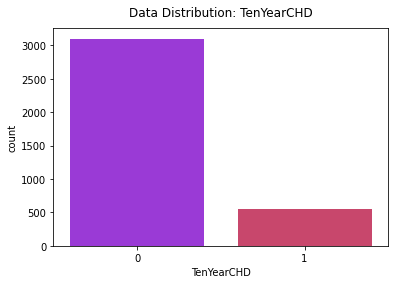

In [20]:
ax = sns.countplot(x="TenYearCHD", data=heart, palette=[ "#A020F0","#DE3163"])
ax.set_title('Data Distribution: TenYearCHD', fontdict={'fontsize':12}, pad=12);
plt.show()

In [21]:
#define x and y
X = heart.iloc[:, :(heart.shape[1]-1)]
Y = heart.iloc[:, -1]

In [22]:
X.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
225,1,53,2.0,0,0.0,0.0,0,0,0,193.0,142.0,89.0,29.56,70.0,78.0
1466,1,59,4.0,0,0.0,0.0,0,0,0,237.0,111.0,80.0,29.77,65.0,72.0
828,1,44,2.0,1,30.0,0.0,0,0,0,217.0,126.0,85.0,28.49,65.0,68.0
2150,1,36,2.0,1,30.0,0.0,0,0,0,310.0,126.0,87.0,28.09,78.0,78.0
1579,1,61,2.0,1,15.0,0.0,0,0,0,204.0,120.0,80.0,25.71,80.0,83.0


Feature Selection

Check Correlation Matrix between X and Y

In [23]:
heart.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


Correlation values between X variables and Y is too small.

Perform Chi Squared Test to Test if X variables are independent of Y variable (TenYearCHD)

Chi_square test for variables:
1. Null Hypothesis: The 2 variables being compared are independent
2. Alternative Hypothesis: There is dependence between the 2 variables being compared

In [24]:
from sklearn.feature_selection import chi2

chi_square, p_values = chi2(X, Y)

In [25]:
p_values_df = pd.DataFrame(p_values, columns=["P-value"], index = X.columns)
p_values_df["Chi-square"] = chi_square
p_values_df["P-value [.3dp]"] = round(p_values_df["P-value"], 3)

ind_bin = [0, 0.05, 1]
ind_label = ["Dependence (Reject H0:No dependence)", "Independence (Fail to Reject H0: No dependence)"]
p_values_df["conclusion"] = pd.cut(p_values_df["P-value"], bins= ind_bin, labels=ind_label)

p_values_df

,P-value,Chi-square,P-value [.3dp],conclusion
male,3.508289e-05,17.120430,0.000,Dependence (Reject H0:No dependence)
age,3.136918e-66,295.507761,0.000,Dependence (Reject H0:No dependence)
education,5.584246e-03,7.679797,0.006,Dependence (Reject H0:No dependence)
currentSmoker,4.072163e-01,0.686913,0.407,Independence (Fail to Reject H0: No dependence)
cigsPerDay,6.363520e-36,156.567318,0.000,Dependence (Reject H0:No dependence)
BPMeds,1.120936e-07,28.153003,0.000,Dependence (Reject H0:No dependence)
prevalentStroke,3.555717e-03,8.497823,0.004,Dependence (Reject H0:No dependence)
prevalentHyp,8.342694e-20,82.967184,0.000,Dependence (Reject H0:No dependence)
diabetes,2.543345e-08,31.027987,0.000,Dependence (Reject H0:No dependence)
totChol,3.972625e-56,249.153078,0.000,Dependence (Reject H0:No dependence)


Select Features with Dependece on TenYearCHD in Chi squared Test

In [26]:
data_features = []

for i in range(len(p_values_df)):
  if p_values_df["P-value"][i] < 0.05:
    data_features.append(p_values_df.index[i])

x_dep = heart[data_features]

In [36]:
x_dep.shape

(3656, 13)

Scale all variables of X to values between 0 and 1 using MinMaxScaler

In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_sc= min_max_scaler.fit_transform(x_dep)

Test Train Split

In [38]:
#model build
x_mb, y_mb, beta = model(X_sc,Y)

In [39]:
x_mb.shape, y_mb.shape, beta.shape

((3656, 14), (3656, 1), (14, 1))

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mb, y_mb, test_size=0.3, random_state=42)

In [41]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape, beta.shape

((2559, 14), (1097, 14), (2559, 1), (1097, 1), (14, 1))

In [42]:
#Fit Data
beta_hat, error = logFit(x_train, y_train, beta)

In [43]:
beta_hat

array([[-5.14561645],
       [ 0.60369821],
       [ 2.53867383],
       [-0.02860949],
       [ 1.58054781],
       [ 0.29284463],
       [ 1.52774422],
       [ 0.16503714],
       [ 0.21527007],
       [ 1.44276053],
       [ 3.47621748],
       [-0.16291402],
       [ 0.04107488],
       [ 2.1817007 ]])

In [44]:
beta_hat.shape, x_train.shape

((14, 1), (2559, 14))

In [45]:
#predict y_hat
y_hat = logPredict(x_test, beta_hat)
y_hat.shape

(1097, 1)

In [46]:
#checking confusion matrix
confusion_matrix = confusionMatrix(y_test,y_hat)
confusion_matrix

,"Actual Positive,",Actual Negative
Predicted Positive,15,10
Predicted Negative,159,913


In [47]:
#checking accuracy using f1Score
f_score = f1Score(y_test,y_hat)
f_score

0.15075376884422112

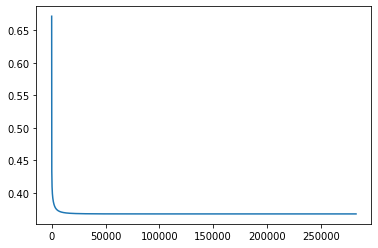

In [48]:
plt.plot(error)


Checking with Sklearn

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [50]:
y_sk_train = y_train.reshape(y_train.shape[0], )

In [51]:
logmodel = LogisticRegression().fit(x_train, y_sk_train)
sklearn_pred = logmodel.predict(x_test)

In [52]:
f1_score(y_test, sklearn_pred)

0.13471502590673579

The Algorithm seems to predict more accurately than Sklearn Algorithm.

F_score for both Algorithms is very low

Although the approximation threshold for the high probability of having the risk of TenYearCHD is 0.5, the framingham risk score study as obtained from Wikipedia states that, individuals with low risk have 10% or less TenYearCHD risk, with intermediate risk 10-20% and, with high risk 20% or more.

Reference: https://en.wikipedia.org/wiki/Framingham_Risk_Score

Considering this, we test a model where the approximation  for the logistic model should be at probability greater than or equal to 20% (>= 0.2)

In [57]:
#model build
x_mb, y_mb, beta = model(X_sc,Y)
x_train, x_test, y_train, y_test = train_test_split(x_mb, y_mb, test_size=0.3, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape, beta.shape

((2559, 14), (1097, 14), (2559, 1), (1097, 1), (14, 1))

In [58]:
#Fit Data
beta_hat, error = logFit(x_train, y_train, beta)

In [59]:
#predict y_hat
y_hat = logPredict(x_test, beta_hat)
y_hat.shape

(1097, 1)

In [60]:
#checking confusion matrix
confusion_matrix = confusionMatrix(y_test,y_hat)
confusion_matrix

,"Actual Positive,",Actual Negative
Predicted Positive,85,177
Predicted Negative,89,746


In [61]:
#checking accuracy using f1Score
f_score = f1Score(y_test,y_hat)
f_score

0.389908256880734

F_score has improved, however, it is still low. What if there is bias in the probability estimation of the TenYearCHD, therefore affecting our estimation?

Data Exploration.

Causes of Cornary Heart Disease:
1. Smoking and Secondhand Smoke Exposure
2. High blood pressure
3. High low-density lipoprotein (LDL) cholesterol 
4. Diabetes
4. Obesity, unhealthy diet, and Physical inactivity

reference: https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm

Let's consider a relationship between Smoking and TenYearCHD. 

* Although CurrentSmoker is independent of TenYearCHD according to the ChiSquare Test, smoking is a cause of Heart Disease, as a result, we will group the data into smokers and non-smokers and consider the association between smoking and TenYearCHD in both groups.

Association Between Smoking and TenYearCHD

In [62]:
group_by_currentSmoker = heart.groupby("currentSmoker").agg({"male":"count","age":"mean", "cigsPerDay":"mean", "BPMeds": "sum",
                                                              "prevalentStroke":"sum", "prevalentHyp":"sum", "diabetes":"sum",
                                                              "totChol":"mean", "BMI":"mean", "heartRate":"mean", "glucose":"mean",
                                                              "TenYearCHD":"sum"}).round(1)
group_by_currentSmoker.transpose()


currentSmoker,0,1
male,1868.0,1788.0
age,51.3,47.7
cigsPerDay,0.0,18.4
BPMeds,73.0,38.0
prevalentStroke,16.0,5.0
prevalentHyp,673.0,466.0
diabetes,63.0,36.0
totChol,239.1,234.6
BMI,26.4,25.1
heartRate,75.1,76.3


**Observation:**
1. There are 1868 non-smokers and 1788 smokers
2. There are 272 non smokers with TenYearCHD and 285 smokers with TenYearCHD
3. The median age in the group of non-smokers approximately 51 
4. The median age in the group of smokers is approximately 47
5. There are more nonsmokers on BPMeds than smokers on BPMeds
6. There are also more diabetic nonsmokers than diabetic smokers
7. There are non-smokers with prevalent hypertension and stroke than smokers

Gender and Age could be subdivided into more groups to see association with TenYearCHD

In [63]:
group_by_gender = heart.groupby(["currentSmoker", "male"]).agg({"age":"mean", "cigsPerDay":"mean", "BPMeds": "sum",
                                                              "prevalentStroke":"sum", "prevalentHyp":"sum", "diabetes":"sum",
                                                              "totChol":"mean", "BMI":"mean", "heartRate":"mean", "glucose":"mean",
                                                              "TenYearCHD":"sum"})
group_by_gender.transpose()

currentSmoker             0                       1            
male                      0           1           0           1
age               51.594947   50.803432   46.929368   48.356779
cigsPerDay         0.000000    0.000000   13.855019   22.226300
BPMeds            54.000000   19.000000   24.000000   14.000000
prevalentStroke   10.000000    6.000000    2.000000    3.000000
prevalentHyp     457.000000  216.000000  176.000000  290.000000
diabetes          34.000000   29.000000   17.000000   19.000000
totChol          243.171964  231.241810  234.265180  234.819572
BMI               26.213456   26.812059   24.464758   25.661040
heartRate         76.665852   72.216849   77.407683   75.477064
glucose           82.647107   83.978159   80.489467   80.604485
TenYearCHD       162.000000  110.000000   88.000000  197.000000

Could there be relationship between Age and currentSmoker, Gender and currentSmoker, also Age and TenYearCHD, and Gender and TenYearCHD?

* We see from the data that male patients that smoke and are younger than 50 years have higher number of TenYearCHD than male patients who are above 50 years and don't smoke.

* On the other hand, female patients that don't smoke and are above 50 years have a higher number of TenYearCHD compared to females who smoke and are below 50 years of age

* Consider females above the age of 50 and dont smoke and males who are younger than 50 and smoke, first group have more patients on BPMeds compared to the latter group, which has the least amount of people on BPMeds

Check for Confounding variable in the dataset

What is Confounding?
* A confounding variable is an unmeasured third variable that influences both the supposed cause and the supposed effect.
>reference: https://www.scribbr.com/methodology/confounding-variables/

* Confounding variables cause distortion in the association between an exposure and health outcome
> reference: https://sph.unc.edu/wp-content/uploads/sites/112/2015/07/nciph_ERIC11.pdf

* Exposure = Causes, HealthOutcome = Effect

* For this project, we will consider one of the exposure which is Smoking and the Health Outcome = TenYearCHD

**Identifying Confounding Variables**

Conditions for Confounding:
1. The confounding factor must be associated with both the risk factor of interest and the outcome.
2. The confounding factor must be distributed unequally among the groups being compared.
3. A confounder cannot be an intermediary step in the causal pathway from the exposure of interest to the outcome of interest.

Through Observation,
Age and Gender satisfy these conditions

Visual Check for Age as a confounder

In [64]:
heart_by_ageClass = pd.read_csv("framingham.csv")
heart_by_ageClass.dropna(axis=0, inplace=True)

In [65]:
age_grp_bin = [ 0,math.trunc(heart_by_ageClass["age"].mean()), 100]
age_class = ["< 50", ">=50"]

heart_by_ageClass["age_grp"] = pd.cut(heart_by_ageClass["age"], bins= age_grp_bin, labels=age_class)

**Condition 1: The confounding factor must be associated with both the risk factor of interest and the outcome**

Association between Age and TenYearCHD

In [66]:
group_by_ageClass = heart_by_ageClass.groupby("age_grp").agg({"TenYearCHD": "sum"})
group_by_ageClass

,TenYearCHD
age_grp,
< 50,159
>=50,398


**Observation:** 
* There are more patients with risk of TenYearCHD in older group than in the young group

**There is a relationship between Age and TenYearCHD**

Association between Age and Smoking

In [67]:
group_by_ageSmoker = heart_by_ageClass.groupby("age_grp").agg({"currentSmoker": "sum"})
group_by_ageSmoker

,currentSmoker
age_grp,
< 50,1119
>=50,669


**Observation**

* There are almost twice as many young smokers below the mean age as there are older smokers above the mean age in the dataset

**There is a relationship between Age and currentSmoker**

**Conclusion:**

* There seems to be a relationship between Age and Risk of TenYearCHD. 
* There is also a relationship between Age and Smoking
* Condition 1 holds true for age

**Condition 2: The confounding factor must be distributed unequally among the groups being compared**
* Check Age Distribution in the Dataset

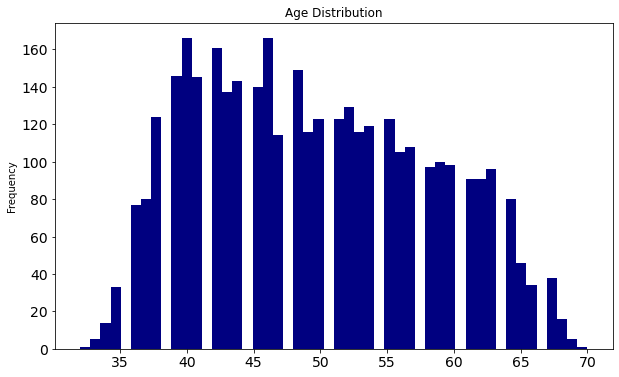

In [69]:
plt.figure(figsize=(10, 6))
ax2 = heart['age'].plot(kind='hist',sharex=True,sharey=True,title='Age Distribution', bins = 50, color = '#000080' )
ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
plt.savefig("abc.png")



**Conclusion:**

* Condition 2 holds true

**Condition 3: A confounder cannot be an intermediary step in the causal pathway from the exposure of interest to the outcome of interest**

In [70]:
grp_by_con3 = heart_by_ageClass.groupby(["currentSmoker", "age_grp"]).agg({"TenYearCHD": "sum"})
grp_by_con3.transpose()

currentSmoker    0         1     
age_grp       < 50 >=50 < 50 >=50
TenYearCHD      46  226  113  172

**Observation:**

The addition of the age strata distorts the association between CurrentSmoker and TenYearCHD.

By Observation, condition 3 holds true



Identifying Confounding through Measure of Association

A "measure of association" quantifies the relationship between exposure(cause) and outcome(effect) among two groups. 
> reference: https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section5.html#:~:text=A%20measure%20of%20association%20quantifies,disease%20among%20the%20two%20groups.



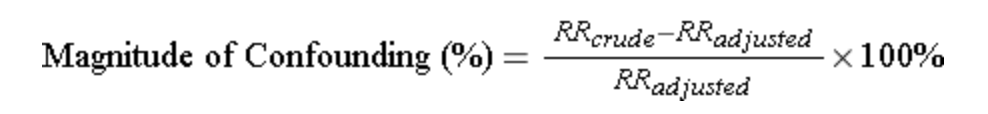

Magnitude of Confounding is the percentage difference in the crude(or unadjusted) and adjusted measure of association for confounding.

RR = Risk Ratio of Relative Risk = compares the risk of a health event  among one group with the risk among another group

Note: Risk Ratio is also known as Measure of Association

RR_adjusted in the equation above is derived from the Mantel-Haenszel formula for Risk Ratio

What is the Mantel-Haenszel Equation:

The Mantel-Haenszel formula allows calculation of an overall, unconfounded (adjusted) effect estimate of a given exposure for a specific outcome by combining (pooling) stratum-specific odds ratios (OR) or relative risks (RR). 

It is a technique that generates an estimate of an association between an exposure and an outcome after adjusting for or taking into account confounding.

In simpler terms, it is the weighted averages of the stratum-specific estimates

Reference: 
* https://communitymedicine4all.com/2021/12/23/stratification-for-confounding-calculating-pooled-odds-ratio-mantel-haenszel-formula/#:~:text=The%20Mantel%2DHaenszel%20formula%20allows,or%20relative%20risks%20(RR).

* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704-ep713_confounding-em/BS704-EP713_Confounding-EM7.html

Using Measure of Association, the following are the conditions for Confounding:

If Uncounfouding exist, the strata-specific Risk Ratio will be equal to the Crude Risk Ratio. Also the percentage in the Crude and Adjusted Risk Ratio will be equal to zero

Approach:
1. Group crude data into exposed(Smokers) and unexposed (NonSmokers)
2. Stratify Grouped Data by the Confounder Variable
3. Compute Strata-Specific Risk Ratio for both groups 
4. Calculate Adjusted Risk Ratio and compute magnitude of effect

In [71]:
#Grouping the Data
a = len(heart[(heart["currentSmoker"]==1)&(heart["TenYearCHD"]==1)])
b = len(heart[(heart["currentSmoker"]==1) & (heart["TenYearCHD"]==0)])
c = len(heart[(heart["currentSmoker"]==0) & (heart["TenYearCHD"] == 1)])
d = len(heart[(heart["currentSmoker"]==0) & (heart["TenYearCHD"] == 0)])

tot_r1 = a+b
tot_r2 = c+d
tot_c1 = a+c
tot_c2 = b+d
tot_c3 = tot_r1 + tot_r2

unadjusted_ana = pd.DataFrame([[a, b, tot_r1], [c, d, tot_r2], [tot_c1, tot_c2, tot_c3]], 
                              columns = ["TenYearCHD", "NoTenYearCHD", "total"], 
                              index = ["Smoker", "NonSmoker", "Total"])
unadjusted_ana

,TenYearCHD,NoTenYearCHD,total
Smoker,285,1503,1788
NonSmoker,272,1596,1868
Total,557,3099,3656


In [72]:
crude_RiskRatio = (unadjusted_ana["TenYearCHD"]["Smoker"]/ unadjusted_ana["total"]["Smoker"]) / (unadjusted_ana["TenYearCHD"]["NonSmoker"]/ unadjusted_ana["total"]["NonSmoker"])
crude_RiskRatio

1.0946752862218714

Crude Risk Ratio = 1.09

This means that, in the dataset, the risk of Coronary Heart Disease in 10 years is slightly greater by 1.09 times the risk of TenYearCHD for people who don't smoke.

Stratify the data by the Confounding Variable Age

In [73]:
heart_young = heart[heart["age"] < 50]
heart_old = heart[heart["age"] >= 50]

Young People (<50 years)

In [77]:
a_y = len(heart_young[(heart_young["currentSmoker"]==1)&(heart_young["TenYearCHD"]==1)])
b_y = len(heart_young[(heart_young["currentSmoker"]==1) & (heart_young["TenYearCHD"]==0)])
c_y = len(heart_young[(heart_young["currentSmoker"]==0) & (heart_young["TenYearCHD"] == 1)])
d_y = len(heart_young[(heart_young["currentSmoker"]==0) & (heart_young["TenYearCHD"] == 0)])

tot_r1_y = a_y + b_y
tot_r2_y = c_y + d_y
tot_c1_y = a_y + c_y
tot_c2_y = b_y + d_y
tot_c3_y = tot_r1_y + tot_r2_y

strat_young = pd.DataFrame([[a_y, b_y, tot_r1_y], [c_y, d_y, tot_r2_y], [tot_c1_y, tot_c2_y, tot_c3_y]], 
                              columns = ["TenYearCHD_Young", "NoTenYearCHD_Young", "Total_Young"], 
                              index = ["Smoker", "NonSmoker", "Total"])
strat_young

,TenYearCHD_Young,NoTenYearCHD_Young,Total_Young
Smoker,113,1006,1119
NonSmoker,46,752,798
Total,159,1758,1917


In [80]:
RiskRatio_young = (strat_young["TenYearCHD_Young"]["Smoker"]/ strat_young["Total_Young"]["Smoker"]) / (strat_young["TenYearCHD_Young"]["NonSmoker"]/ strat_young["Total_Young"]["NonSmoker"])
RiskRatio_young

1.7518358783074952

RiskRatio in the Young Group = 1.75

In younger people (below the age of 50), people who smoke have a higher risk of 1.75 times the risk for people who don't smoke.


Older People (>=50 years)


In [81]:
a_o = len(heart_old[(heart_old["currentSmoker"]==1)&(heart_old["TenYearCHD"]==1)])
b_o = len(heart_old[(heart_old["currentSmoker"]==1) & (heart_old["TenYearCHD"]==0)])
c_o = len(heart_old[(heart_old["currentSmoker"]==0) & (heart_old["TenYearCHD"] == 1)])
d_o = len(heart_old[(heart_old["currentSmoker"]==0) & (heart_old["TenYearCHD"] == 0)])

tot_r1_o = a_o + b_o
tot_r2_o = c_o + d_o
tot_c1_o = a_o + c_o
tot_c2_o = b_o + d_o
tot_c3_o = tot_r1_o + tot_r2_o

strat_old = pd.DataFrame([[a_o, b_o, tot_r1_o], [c_o, d_o, tot_r2_o], [tot_c1_o, tot_c2_o, tot_c3_o]], 
                              columns = ["TenYearCHD - Old", "NoTenYearCHD - Old", "Total - Old"], 
                              index = ["Smoker", "NonSmoker", "Total"])
strat_old

,TenYearCHD - Old,NoTenYearCHD - Old,Total - Old
Smoker,172,497,669
NonSmoker,226,844,1070
Total,398,1341,1739


In [82]:
RiskRatio_old = (strat_old["TenYearCHD - Old"]["Smoker"]/ strat_old["Total - Old"]["Smoker"]) / (strat_old["TenYearCHD - Old"]["NonSmoker"]/ strat_old["Total - Old"]["NonSmoker"])
RiskRatio_old

1.2172440705318992

Risk Ratio in Older Group = 1.22

Therefore, in the older group, people who smoke have higher risk of 1.22 times the risk of TenYearCHD for people who don't smoke

Observation

* The Strata-Specific Risk Ratios are not equal to the Crude Risk Ratios. Confounding Exists

Calculate the adjusted/pooled Risk Ratio for both strata

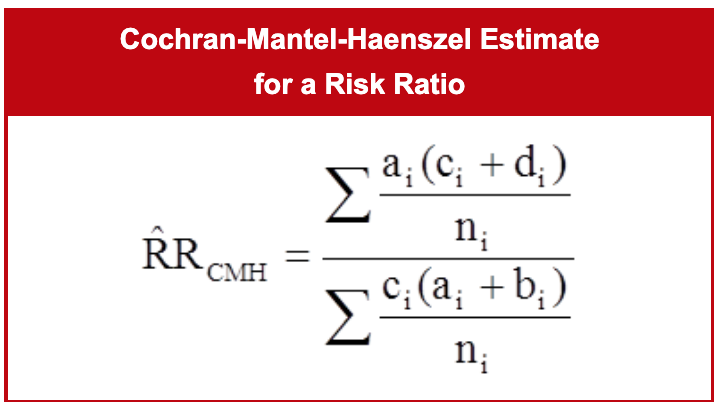

In [88]:
RRnum1 = (strat_young["TenYearCHD_Young"]["Smoker"] *(strat_young["TenYearCHD_Young"]["NonSmoker"]+ strat_young["NoTenYearCHD_Young"]["NonSmoker"]))/(strat_young["Total_Young"]["Total"])
RRnum2 = (strat_old["TenYearCHD - Old"]["Smoker"] *(strat_old["TenYearCHD - Old"]["NonSmoker"]+ strat_old["NoTenYearCHD - Old"]["NonSmoker"]))/(strat_old["Total - Old"]["Total"])
RRdenom1 = (strat_young["TenYearCHD_Young"]["NonSmoker"] *(strat_young["TenYearCHD_Young"]["Smoker"] + strat_young["NoTenYearCHD_Young"]["Smoker"]))/(strat_young["Total_Young"]["Total"])
RRdenom2 = (strat_old["TenYearCHD - Old"]["NonSmoker"] *(strat_old["TenYearCHD - Old"]["Smoker"] + strat_old["NoTenYearCHD - Old"]["Smoker"]))/(strat_old["Total - Old"]["Total"])

RR_adjusted = (RRnum1+RRnum2)/(RRdenom1+RRdenom2)
RR_adjusted

1.3433882484251098

In [89]:
mag_of_effect = ((crude_RiskRatio - RR_adjusted)/RR_adjusted)*100
mag_of_effect

-18.513855729705195

**Conclusion:**

Age is a confounding variable with a negative confounding effect. This could therefore mean that the confounding variable, Age, is causing an underestimation of the true association of Smoking and TenYearCHD.

Therefore, we can conclude that the variable Age is causing a confounding bias in the estimation of the relationship between smoking and risk of TenYearCHD

reference:
> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2597522/#:~:text=It%20refers%20to%20a%20situation,confounding%20variable%20or%20the%20confounder.

Check if Gender is a Confounding Variable for Smoking as Primary Exposure

Association between Gender and TenYearCHD

In [90]:
gen_tenchd = heart.groupby("male").agg({"TenYearCHD": "sum"})
gen_tenchd

,TenYearCHD
male,
0,250
1,307


**Observation:** 
* There are more males with risk of TenYearCHD than females

Association between Gender and Smoking

In [91]:
group_by_genderSmoker = heart.groupby("male").agg({"currentSmoker": "sum"})
group_by_genderSmoker

,currentSmoker
male,
0,807
1,981


**Observation**

* There are more male smokers than female smokers

Distribution of Gender in the dataset

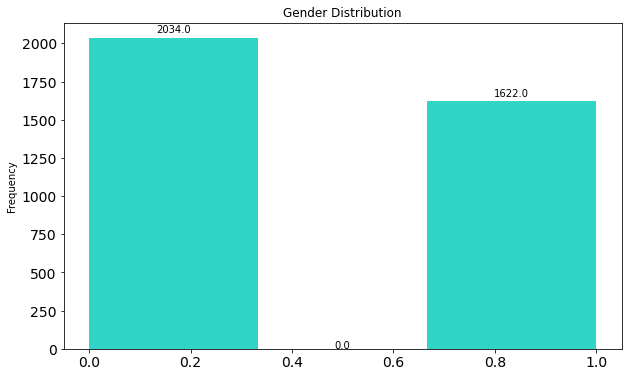

In [94]:
#heart["male"].hist(bins=3, color = '#30D5C8', title = 'Gender Distribution')
plt.figure(figsize=(10, 6))
ax= heart['male'].plot(kind='hist',sharex=True,sharey=True,title='Gender Distribution', bins = 3, color = '#30D5C8' )

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



plt.show() 


**Observation:**

* Gender (variable name = male) is unequally distributed between both groups.

**Condition 2 holds true**

In [95]:
grp_by_gencon3 = heart.groupby(["currentSmoker", "male"]).agg({"TenYearCHD": "sum"})
grp_by_gencon3.transpose()

currentSmoker    0        1     
male             0    1   0    1
TenYearCHD     162  110  88  197

**Observation**

1. So far we know that the risk of TenYearCHD is higher in Males than in Females
2. We also know that there are more male smokers than female smoker.

**But can we say the risk of TenYearCHD is higher in males than in females because there are more males that smoke than females?**

* From the table above, we see that in grouping the data into exposed and unexposed, the number of males that smoke and have the risk of TenYearCHD is more than twice the number for females who smoke and have the TenYearCHD.

* In comparison to the unexposed group who do not smoke, the number of females with the risk of TenYearCHD is more than the males.

**Does this therefore mean that, in a group of people that don't smoke, Females have a higher risk of TenYearCHD than males and in the group of people who smoke, Males have a higher risk of TenYearCHD than Males?**

Measure of Association

Stratify the data by the confounder variable, Gender

In [96]:
heart_male = heart[heart["male"] == 1]
heart_female = heart[heart["male"] == 0]

Male Strata

In [97]:
a_m = len(heart_male[(heart_male["currentSmoker"]==1)&(heart_male["TenYearCHD"]==1)])
b_m = len(heart_male[(heart_male["currentSmoker"]==1) & (heart_male["TenYearCHD"]==0)])
c_m = len(heart_male[(heart_male["currentSmoker"]==0) & (heart_male["TenYearCHD"] == 1)])
d_m = len(heart_male[(heart_male["currentSmoker"]==0) & (heart_male["TenYearCHD"] == 0)])

tot_r1_m = a_m + b_m
tot_r2_m = c_m + d_m
tot_c1_m = a_m + c_m
tot_c2_m = b_m + d_m
tot_c3_m = tot_r1_m + tot_r2_m

strat_male = pd.DataFrame([[a_m, b_m, tot_r1_m], [c_m, d_m, tot_r2_m], [tot_c1_m, tot_c2_m, tot_c3_m]], 
                              columns = ["TenYearCHD_Male", "NoTenYearCHD_Male", "total_Male"], 
                              index = ["Smoker", "NonSmoker", "Total"])
strat_male

,TenYearCHD_Male,NoTenYearCHD_Male,total_Male
Smoker,197,784,981
NonSmoker,110,531,641
Total,307,1315,1622


In [98]:
RiskRatio_male = (strat_male["TenYearCHD_Male"]["Smoker"]/ strat_male["total_Male"]["Smoker"]) / (strat_male["TenYearCHD_Male"]["NonSmoker"]/ strat_male["total_Male"]["NonSmoker"])
RiskRatio_male

1.1702066536928923

RiskRatio in the Male Strata = 1.17

For Males, people who smoke have a higher risk of 1.17 times the risk of TenYearCHD for people who don't smoke.

Female Strata

In [99]:
a_f = len(heart_female[(heart_female["currentSmoker"]==1)&(heart_female["TenYearCHD"]==1)])
b_f = len(heart_female[(heart_female["currentSmoker"]==1) & (heart_female["TenYearCHD"]==0)])
c_f = len(heart_female[(heart_female["currentSmoker"]==0) & (heart_female["TenYearCHD"] == 1)])
d_f = len(heart_female[(heart_female["currentSmoker"]==0) & (heart_female["TenYearCHD"] == 0)])

tot_r1_f = a_f + b_f
tot_r2_f = c_f + d_f
tot_c1_f = a_f + c_f
tot_c2_f = b_f + d_f
tot_c3_f = tot_r1_f + tot_r2_f

strat_female = pd.DataFrame([[a_f, b_f, tot_r1_f], [c_f, d_f, tot_r2_f], [tot_c1_f, tot_c2_f, tot_c3_f]], 
                              columns = ["TenYearCHD_Female", "NoTenYearCHD_Female", "total_Female"], 
                              index = ["Smoker", "NonSmoker", "Total"])
strat_female

,TenYearCHD_Female,NoTenYearCHD_Female,total_Female
Smoker,88,719,807
NonSmoker,162,1065,1227
Total,250,1784,2034


In [100]:
RiskRatio_female = (strat_female["TenYearCHD_Female"]["Smoker"]/ strat_female["total_Female"]["Smoker"]) / (strat_female["TenYearCHD_Female"]["NonSmoker"]/ strat_female["total_Female"]["NonSmoker"])
RiskRatio_female

0.8259213364541741

RiskRatio in the Male Strata = 1.17

For Females, people who smoke have a lesser risk of 0.83 times the risk of TenYearCHD for people who don't smoke.

*this is so interesting*

Mantel-Haenszel Estimate

In [101]:
RRnum1_g = (strat_male["TenYearCHD_Male"]["Smoker"] *(strat_male["TenYearCHD_Male"]["NonSmoker"]+ strat_male["NoTenYearCHD_Male"]["NonSmoker"]))/(strat_male["total_Male"]["Total"])
RRnum2_g = (strat_female["TenYearCHD_Female"]["Smoker"] *(strat_female["TenYearCHD_Female"]["NonSmoker"]+ strat_female["NoTenYearCHD_Female"]["NonSmoker"]))/(strat_female["total_Female"]["Total"])
RRdenom1_g = (strat_male["TenYearCHD_Male"]["NonSmoker"] *(strat_male["TenYearCHD_Male"]["Smoker"] + strat_male["NoTenYearCHD_Male"]["Smoker"]))/(strat_male["total_Male"]["Total"])
RRdenom2_g = (strat_female["TenYearCHD_Female"]["NonSmoker"] *(strat_female["TenYearCHD_Female"]["Smoker"] + strat_female["NoTenYearCHD_Female"]["Smoker"]))/(strat_female["total_Female"]["Total"])

RR_adjusted_g = (RRnum1_g+RRnum2_g)/(RRdenom1_g+RRdenom2_g)
RR_adjusted_g

1.0010311964776675

In [102]:
mag_of_effect_g = ((crude_RiskRatio - RR_adjusted_g)/RR_adjusted_g)*100
mag_of_effect_g

9.354762376408422

**Conclusion**

When the data is stratified by gender, the magnitude of confounding is less than 10%. That is the percentage difference between the crude Risk Ratio and the adjusted Risk Ratio is less than 10%.

Due to this, we can say that there is confounding bias caused by gender, if any confounding exists.

Reference:
https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module11-Confounding-EMM/PH717-Module11-Confounding-EMM5.html#:~:text=If%20the%20%25%20difference%20is%2010,little%2C%20if%20any%2C%20confounding.

**Summary**

When we consider Smoking as the Primary Exposure for the Risk of TenYearCHD, 

Taking the Raw Data, 
> We see that people who smoke have a higher risk of Coronary Heart Disease than People who don't smoke

1. However, when we stratify this data by age,

* In people who are below the age of 50 years, the risk of TenYearCHD between smokers and nonSmokers is even higher at a value of 1.75. This tells us that in the younger people below the age of 50, the risk of TenYearCHD in Smokers is almost twice the risk of TenYearCHD in NonSmokers.

* In people who are above the age of 50 years, the risk of TenYearCHD in Smokers is still higher than the risk of TenYearCHD in NonSmokers but not as much, when compared to people who are below the age of 50.

* The Strata-Specific Risk Ratio for both groups are higher than the Crude Risk Ratio and the Magnitude of Confounding when the data is stratified by Age is greater than 10%, but in a negative direction. This means that, in the estimation of the association between Smoking and risk of TenYearCHD, there is an underestimation of this relationship caused by age

2. When we stratify the data by gender,
* We see that in Males, People who smoke have a higher risk of TenYearCHD compared to People who don't smoke.

* In contrast to this, in Females, Poeple who smoke have a lesser risk of TenYearCHD compared to People who don't smoke.

* Although the Strata-Specific Risk Ratios for Males and Females are higher than the Crude Risk Ratio, the magnitude of confounding when the data is stratified by Gender is less than 10%. This, therefore, means that if bias exists in the association between Smoking and the risk of TenYearCHD, the confounding effect caused by gender is little! 

So we can say that the reason for the low F_score in our prediction is as a result of the presence of Confounders in our variables which cause a false relationship between our Features and TenYearCHD.

In order to resolve this, we will need to analyze further and consider the association between each Exposure and TenYearCHD risk and then adjust for confounders to be able to get the true estimation of the TenYearCHD given the exposures (or causes) per individual 